In [1]:
import pandas as pd
from sklearn import *
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/creditcard-fraud.csv.gz")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
df.Class.value_counts()/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [6]:
target = "Class"

y = df[target]
X = df.loc[:, "V1":"V28"]
#X = df.drop(columns=target)
#X = pd.get_dummies(X, drop_first=True)

features = X.columns

#X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
#                , test_size = 0.3, random_state = 1)

training_size = int(0.7 * len(df))
X_train = X.values[:training_size,:]
y_train = y.values[:training_size]
X_test = X.values[training_size:,:]
y_test = y.values[training_size:]


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(solver="liblinear"))
])

pipe.fit(X_train, y_train)

y_train_predict = pipe.predict(X_train)
y_test_predict = pipe.predict(X_test)



In [7]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.80      0.51      0.62       108

    accuracy                           1.00     85443
   macro avg       0.90      0.75      0.81     85443
weighted avg       1.00      1.00      1.00     85443



In [8]:
print("confusion metrics: \n", metrics.confusion_matrix(y_test, y_test_predict))

confusion metrics: 
 [[85321    14]
 [   53    55]]


In [9]:
print("TPR", 55/(55+53))
print("FPR", 14/(14+85321))

TPR 0.5092592592592593
FPR 0.00016405929571688052


In [10]:
print("train preicision: ", metrics.precision_score(y_train, y_train_predict))
print("test preicision: ", metrics.precision_score(y_test, y_test_predict))
print("train recall: ", metrics.recall_score(y_train, y_train_predict))
print("test recall: ", metrics.recall_score(y_test, y_test_predict))
print("train f1: ", metrics.f1_score(y_train, y_train_predict))
print("test f1: ", metrics.f1_score(y_test, y_test_predict))
print("train accuracy: ", metrics.accuracy_score(y_train, y_train_predict))
print("test accuracy: ", metrics.accuracy_score(y_test, y_test_predict))

train preicision:  0.8489208633093526
test preicision:  0.7971014492753623
train recall:  0.6145833333333334
test recall:  0.5092592592592593
train f1:  0.7129909365558912
test f1:  0.6214689265536724
train accuracy:  0.999046969362573
test accuracy:  0.9992158515033414


Text(0.5, 1.0, 'ROC 0.9707251811488057')

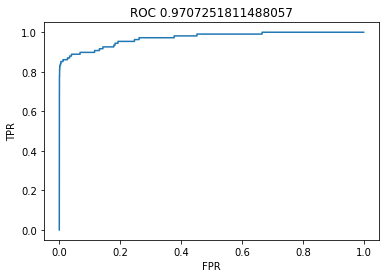

In [11]:
y_test_prob = pipe.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC ")
auc = metrics.auc(fpr, tpr)
plt.title("ROC " + str(auc)) 

In [12]:
metrics.roc_auc_score(y_test, y_test_prob)

0.9707251811488057

In [13]:
df.Amount.values[training_size:][(y_test == 0) & (y_test_predict == 0)].sum()

7224977.579999999

In [14]:
df.Amount.values[training_size:][(y_test == 1) & (y_test_predict == 0)].sum()

8336.050000000001

In [15]:
100 * 8336.050000000001/7224977.579999999

0.115378212703049